## Question 2

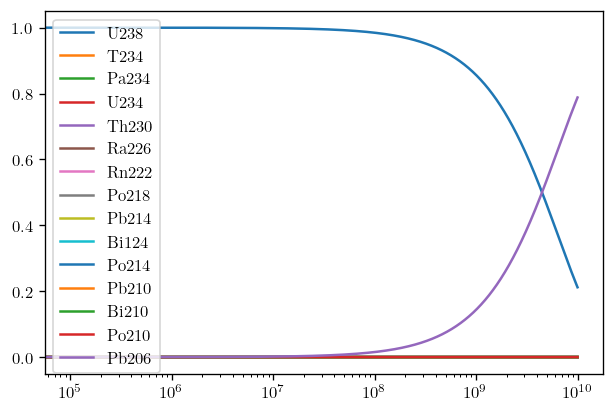

In [8]:
# Question 2 a)

import numpy as np 
import matplotlib.pyplot as plt
from scipy import integrate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 120

# elements of the decay chain of U238 (except the final, stable elemtent)
elements = ['U238', 'T234', 'Pa234', 'U234', 'Th230', 'Ra226', 'Rn222', 'Po218', 'Pb214', 'Bi124', 'Po214', 'Pb210', 'Bi210', 'Po210']
# half life, in years, of the elements of the decay chain of U238
half_life = [4.468e9,0.06598,0.0007643, 245500,75380,1600,0.010468,0.00000589,0.00005095,0.00003784,5.206e-12,22.3,5.015,0.37885]

# the system of ODEs associated with nuclear decay for k steps is
# dN_1(t)/dt = -ln(2)/t_1,1/2 N_1(t)
# dN_i(t)/dt = -ln(2)/t_i,1/2 N_i(t) + ln(2)/t_i-1,1/2 N_i-1(t)
# dN_k(t) = ln(2)/t_k-1,1/2 N_k-1(t)
# where N is the quantity of element and t_1/2 is the half life

def decay_ODEs(t, N, k):

    dNdt = np.zeros(len(k) +1)  # change of quantity for all elements including the last one (which is not in the dict)

    dNdt[0] = -N[0]*np.log(2) / k[0] # first element (U238) decay

    for i in range(0, len(k) - 1):
        dNdt[i + 1] = (N[i] / k[i] -N[i + 1] / k[i + 1]) * np.log(2) # intermediate elements of the chain

    
    dNdt[-1] = N[len(k) - 1] / k[len(k) - 1]*np.log(2) # last element of chain: stable so does not decay

    return dNdt

t = np.linspace(0, 1e10, 100000)
N0 = np.zeros(len(half_life) + 1)
N0[0] = 1 # start with pure U238

# use solve_ivp from scipy to take care of this. Radau method because we have stiff equations
sol = integrate.solve_ivp(fun= lambda t,y: decay_ODEs(t, y, half_life), t_span=[t[0], t[-1]],t_eval = t,y0 = N0, method='Radau')

elements.append('Pb206')

for i in range(np.shape(sol.y)[0]):
    plt.semilogx(sol.t, sol.y[i], label = elements[i])
plt.legend()
plt.show()


I had to use the Radau method which is implicit and is much better to handle stiff equations (like we have here). We can see that all intermediate elements of the decay chain have proportions that remain really close to 0 at all times. This is because they all have short half life compared to U238 and Pb206 (which is stable). We can really just approximate the whole chain as decay of U238 directly to Pb206.

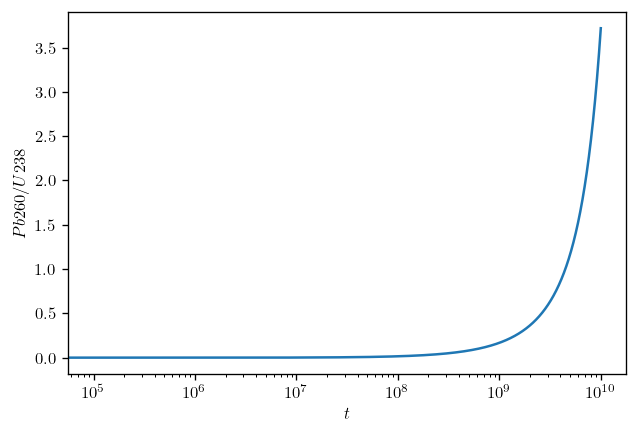

In [131]:
# Question 2 b)

# ratio of Pb206 to U238
plt.semilogx(sol.t, sol.y[-1]/sol.y[0])
plt.xlabel('$t$')
plt.ylabel('$Pb206/U238$')
plt.show()

This makes sense. We start with a ratio of Pb206:U238 of 0:1, and towards the end of the process, we should have a ratio of 1:0, which goes to infinity exponentially as the decay rates are exponential.

C:\Users\Greg\AppData\Local\Temp\ipykernel_15044\613762570.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(sol.t, sol.y[5]/sol.y[4], '-')


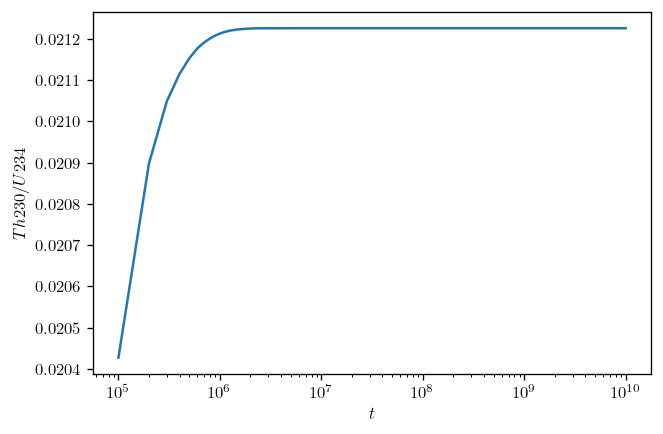

In [133]:
# ratio of Th230 to Th234
plt.semilogx(sol.t, sol.y[4]/sol.y[3], '-')
plt.xlabel('$t$')
plt.ylabel('$Th230/U234$')
plt.show()

This also makes sense. The amount of Th230 grows exponentially until its growth rate matches the growth rate of U234. Then, they will have similar decay rate, which is why we see the ratio being constant at around 0.3. I assume that the growth/decay rate of these two elements can match up because they have similar half life (245 500 years for U234 and 75 380 years for Th230).